In [1]:
import numpy as np
import sympy as sp
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from scipy.integrate import quad

from matplotlib import rcParams 
rcParams['text.latex.preamble'] = r'\usepackage{amsmath}' 
rcParams['text.usetex']         = True 
rcParams['font.family']         = 'sans-serif' 
rcParams['font.sans-serif']     = ['Helvetica']

In [2]:
def integrate(func,a,b,which='gauss',n=10,args=None):
    
    if which != 'gauss':
        h = (b-a)/n
        X = np.linspace(a,b,n+1)
        if args:
            Y = func(X,*args)
        else:
            Y = func(X)
            
    if which == 'simpson':
        if n % 2 != 0: return "Need even number of subdivisions"
        result = 0.0
        for i in range(int(n/2)):
            l = 2*i
            result += h/3.0 * (Y[l] + 4*Y[l+1] + Y[l+2])
    elif which == 'trapezoid':
        result = np.sum((Y[:-1] + Y[1:])*h/2.0)
    elif which == 'left':
        result = np.sum(Y[:-1]*h)
    elif which == 'right':
        result = np.sum(Y[1:]*h)
    elif which == 'gauss':
        X  = (b-a)/2.0 * np.array([0.7745966692414834,0.0,-0.7745966692414834]) + (b+a)/2.0
        W = (b-a)/2.0 * np.array([0.5555555555555556,0.8888888888888888,0.5555555555555556])
        if args: 
            Y = func(X,*args)
        else:
            Y = func(X)
        result = np.sum(Y*W)
        
    return result

### Section 3

In [3]:
f = lambda z,x: 1/4.0/np.pi * x/(x**2 + z**2)**(3.0/2.0)

In [4]:
x = np.linspace(0.1,1.0)
z0 = -0.5
z1 = 0.5
n = 10

problem 1

In [5]:
left  = np.array([integrate(f,z0,z1,which='left',n=10,args=[_]) for _ in x])
right = np.array([integrate(f,z0,z1,which='right',n=10,args=[_]) for _ in x])
simp  = np.array([integrate(f,z0,z1,which='simpson',n=10,args=[_]) for _ in x])
trap  = np.array([integrate(f,z0,z1,which='trapezoid',n=10,args=[_]) for _ in x])

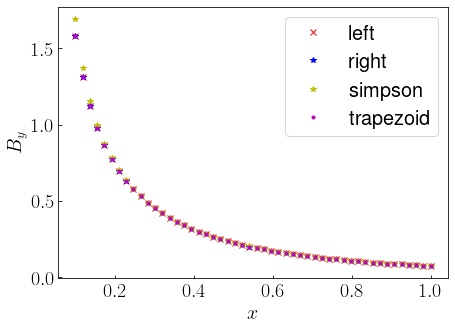

In [6]:
exact = 1/(2.0 * np.pi * x)
nrows=1;ncols=1
fig,ax = plt.subplots(nrows=nrows,ncols=ncols,figsize=(7*ncols,5*nrows))

ax.plot(x,left,'rx',label='left')
ax.plot(x,right,'b*',label='right')
ax.plot(x,simp,'y*',label='simpson')
ax.plot(x,trap,'m.',label='trapezoid')
# ax.plot(x,exact,label='exact')
ax.legend(fontsize=20,loc='upper right')

ax.set_xlabel(r'$x$',size=20)
ax.set_ylabel(r'$B_y$',size=20)
ax.tick_params(axis='both',which='major',direction='in',labelsize=20)

plt.show()

Problem 2

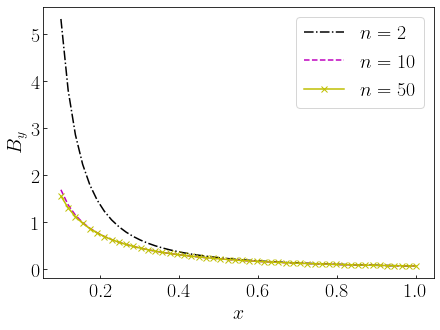

In [7]:
nrows=1;ncols=1
fig,ax = plt.subplots(nrows=nrows,ncols=ncols,figsize=(7*ncols,5*nrows))

N  = [2,10,50]
ls = ['k-.','m--','y-x']
for i in range(len(N)):
    approx = np.array([integrate(f,z0,z1,which='simpson',n=N[i],args=[_]) for _ in x])
    ax.plot(x,approx,ls[i],label=r'$n=%d$'%N[i])
ax.legend(fontsize=20,loc='upper right')
ax.set_xlabel(r'$x$',size=20)
ax.set_ylabel(r'$B_y$',size=20)
ax.tick_params(axis='both',which='major',direction='in',labelsize=20)

plt.show()

problem 3

In [8]:
f = lambda x: np.sqrt(1.0-x**2.0)

In [9]:
N = [2,10,50,100,500,1000]
for _ in N:
    pi = 2*integrate(f,-1.0,1.0,which='simpson',n=_)
    print('n = %d -> pi = %.10f \n\t error = %.10f\n'%(_,pi,np.pi-pi))

n = 2 -> pi = 2.6666666667 
	 error = 0.4749259869

n = 10 -> pi = 3.1001739601 
	 error = 0.0414186935

n = 50 -> pi = 3.1379123350 
	 error = 0.0036803186

n = 100 -> pi = 3.1402925778 
	 error = 0.0013000758

n = 500 -> pi = 3.1414764515 
	 error = 0.0001162021

n = 1000 -> pi = 3.1415515735 
	 error = 0.0000410801



### Section 5.4

\begin{align*}
d\vec{B} = \frac{d\vec{l} \times \Delta \vec{r}}{\Delta r^3}
\end{align*}

In [24]:
t = sp.Symbol('t',real=True)

# xp = (2+sp.cos(10*t))*sp.cos(t); yp = (2+sp.cos(10*t))*sp.sin(t); zp = sp.sin(10*t)
xp = sp.sin(t); yp = sp.cos(t); zp = 0#(t-sp.pi)/10#sp.sin(20*t)
xf = sp.lambdify((t),xp); yf = sp.lambdify((t),yp); zf = sp.lambdify((t),zp)

x,y,z = sp.symbols('x y z',real=True)

source = sp.Matrix([xp,yp,zp])
field  = sp.Matrix([x,y,z])
dldt   = sp.diff(source,t)
drvec  = field - source
drmag  = drvec.norm()

integrand = dldt.cross(drvec)/drmag**3/4/sp.pi

dBx = sp.lambdify((t,x,y,z),integrand[0].simplify())
dBy = sp.lambdify((t,x,y,z),integrand[1].simplify())
dBz = sp.lambdify((t,x,y,z),integrand[2].simplify())

In [25]:
# t0=-1.0; t1=1.0; N=100
# x_vals = np.cos(5*np.pi*t_vals)
# y_vals = np.sin(5*np.pi*t_vals)
# z_vals = t_vals

In [26]:
def B(x_,y_,z_):
    # Bx = integrate(dBx,0.0,2*np.pi,args=(x_,y_,z_,))
    # By = integrate(dBy,0.0,2*np.pi,args=(x_,y_,z_,))
    # Bz = integrate(dBz,0.0,2*np.pi,args=(x_,y_,z_,))
    Bx = quad(dBx,0.0,2*np.pi,args=(x_,y_,z_,))[0]
    By = quad(dBy,0.0,2*np.pi,args=(x_,y_,z_,))[0]
    Bz = quad(dBz,0.0,2*np.pi,args=(x_,y_,z_,))[0]
    return np.array([Bx,By,Bz])

In [27]:
# z = np.linspace(-1.0,1.0)
# Bz = np.array([B(0.0,0.0,_)[-1] for _ in z])
# plt.plot(z,Bz)
# plt.show()

In [34]:
N=500
t_vals = np.linspace(0.0,2*np.pi,N)
wire = [xf(t_vals),yf(t_vals),zf(t_vals)]

n = 8
# t = np.linspace(0.0,2*np.pi,n)
# x_vals = 1.5*np.cos(t)
# y_vals = 1.5*np.sin(t)
# x_vals = np.zeros(n)
x_vals = np.linspace(-0.5,0.5,n)
# y_vals = np.zeros(n)
y_vals = np.linspace(-0.5,0.5,n)
# z_vals = np.zeros(len(t))
z_vals = np.linspace(-1.0,1.0,n)

X,Y,Z = np.meshgrid(x_vals,y_vals,z_vals)

In [35]:
def get_B(X_,Y_,Z_):
    Bx = np.zeros(np.shape(X_))
    By = np.zeros(np.shape(Y_))
    Bz = np.zeros(np.shape(Z_))
    for i in range(n):
        for j in range(n):
            for k in range(n):
                x = X_[i][j][k];y=Y_[i][j][k];z=Z_[i][j][k]
                # if x==1.0 and y==1.0 and z==0.0: print('yes')
                # if z==0.0: #and abs(y - np.sqrt(abs(1.0-x**2.0))) < 0.3:
                    # continue
                Bvec = B(x,y,z)
                Bx[i][j][k] = Bvec[0]
                By[i][j][k] = Bvec[1]
                Bz[i][j][k] = Bvec[2]
    return Bx,By,Bz

In [36]:
Bx,By,Bz = get_B(X,Y,Z)

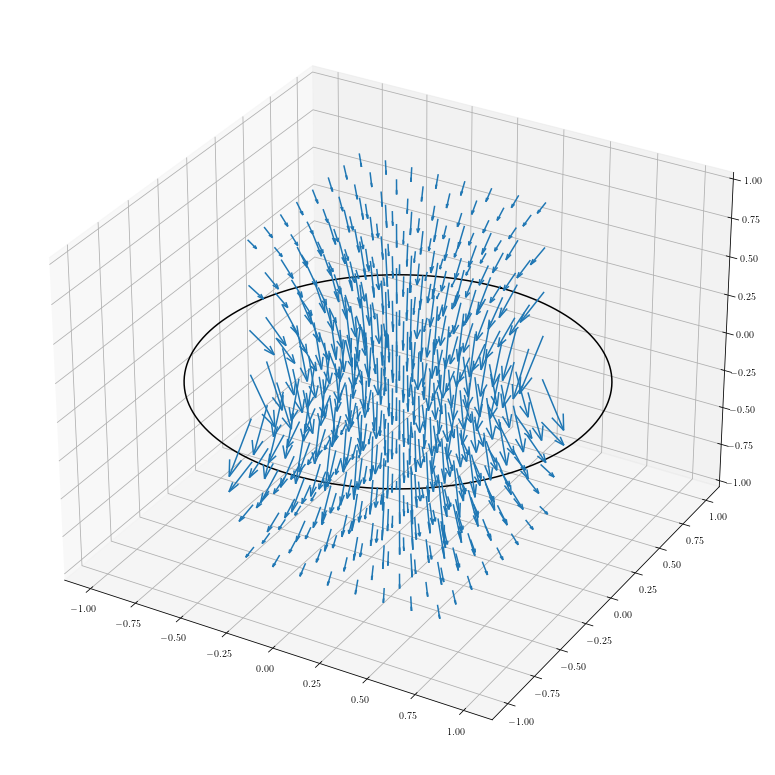

In [37]:
fig, ax = plt.subplots(1,1,figsize=(14,14),subplot_kw=dict(projection='3d'))

# for i in range(len(t)):
#     Bx,By,Bz = B(x_vals[i],y_vals[i],z_vals[i])
#     ax.quiver(x_vals[i],y_vals[i],z_vals[i],Bx,By,Bz,length=1)
ax.quiver(X,Y,Z,Bx,By,Bz,length=0.5)
# ax.plot3D(x_vals,y_vals,z_vals,color='r')
ax.plot3D(wire[0],wire[1],wire[2],color='k')

plt.show()